In [1]:
from pylab import *
import scipy.signal as signal

#Plot frequency and phase response
def mfreqz(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * log10 (abs(h))
    subplot(211)
    plot(w/max(w),h_dB)
    ylim(-150, 5)
    ylabel('Magnitude (db)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Frequency response')
    subplot(212)
    h_Phase = unwrap(arctan2(imag(h),real(h)))
    plot(w/max(w),h_Phase)
    ylabel('Phase (radians)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Phase response')
    subplots_adjust(hspace=0.5)

#Plot step and impulse response
def impz(b,a=1):
    l = len(b)
    impulse = repeat(0.,l); impulse[0] =1.
    x = arange(0,l)
    response = signal.lfilter(b,a,impulse)
    subplot(211)
    stem(x, response)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Impulse response')
    subplot(212)
    step = cumsum(response)
    stem(x, step)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Step response')
    subplots_adjust(hspace=0.5)


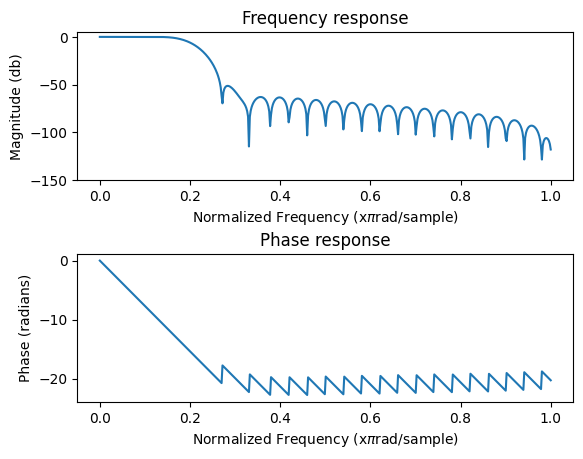

In [2]:
n = 50
a = signal.firwin(n, cutoff = 0.2, window = "hamming", pass_zero="lowpass")
#Frequency and phase response
mfreqz(a)
show()

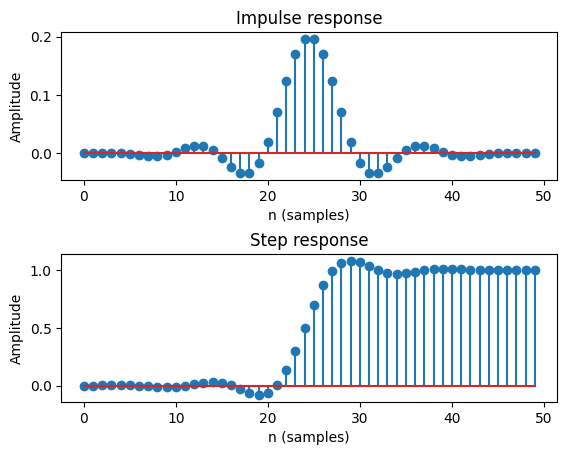

In [3]:
figure(2)
impz(a)
show()